<a href="https://colab.research.google.com/github/roqueee06/-EDA-Analise-de-Fraudes/blob/main/An%C3%A1liseDeFraudes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Análise em Fraudes de Cartão de Crédito**


---


## 1. Introdução
Neste notebook, realizo uma **análise exploratória de dados** de transações fraudulentas na modalidade de **cartão de crédito**, afim de entender o **comportamento de transações suspeitas**.

A base de dados utilizada neste projeto contém registros de transações realizadas, incluindo variáveis comportamentais relevantes, como:


* Distância entre transações consecutivas;

* Distância entre o local da compra e o endereço do titular do cartão;

* Razão entre o preço médio do cartão e a transação;

* Indicação de transação online;

* Repetição de estabelecimentos;

* Classificação da transação como fraudulenta ou legítima.


---












## 2. Preparação da Base de Dados
### 2.1. Bibliotecas
Importando bibliotecas do python que serão utilizadas ao longo do projeto para nos auxiliar.


In [48]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore', category=FutureWarning)

### 2.2. Base de Dados
Importando a base de dados com a bibilioteca **pandas** que será utilizada durante o nosso projeto, base essa encontrada diretamente pelo site do **Kaggle** [clicando aqui](https://www.kaggle.com/datasets/dhanushnarayananr/credit-card-fraud).

In [49]:
df = pd.read_csv('card_transdata.csv')

Base importada com sucesso!

Agora vamos visualizar como os nossos dados estão distribuidos em nosso DataFrame:

In [50]:
df.head(5)

,distancia_de_casa,distancia_da_ultima_transacao,razao_preco_medio_compra,repetiu_estabelecimento,usou_chip,usou_pin,pedido_online,fraude
0,57.877857,0.311140,1.945940,1.0,1.0,0.0,0.0,0.0
1,10.829943,0.175592,1.294219,1.0,0.0,0.0,0.0,0.0
2,5.091079,0.805153,0.427715,1.0,0.0,0.0,1.0,0.0
3,2.247564,5.600044,0.362663,1.0,1.0,0.0,1.0,0.0
4,44.190936,0.566486,2.222767,1.0,1.0,0.0,1.0,0.0


Acima podemos visualizar que os dados trazidos, são índices comportamentais das transições, possuindo as variáveis quantitativas de distâncias e razão e as variáveis qualitativas como as colunas que retorna se é fraude ou não, entre as restantes das colunas.

E agora iremos ver mais informações sobre a nossa base:



In [51]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 8 columns):
 #   Column                         Non-Null Count    Dtype  
---  ------                         --------------    -----  
 0   distancia_de_casa              1000000 non-null  float64
 1   distancia_da_ultima_transacao  1000000 non-null  float64
 2   razao_preco_medio_compra       1000000 non-null  float64
 3   repetiu_estabelecimento        1000000 non-null  float64
 4   usou_chip                      1000000 non-null  float64
 5   usou_pin                       1000000 non-null  float64
 6   pedido_online                  1000000 non-null  float64
 7   fraude                         1000000 non-null  float64
dtypes: float64(8)
memory usage: 61.0 MB


Com essas informações, concluimos que nossa base de dados possuem **1 milhão de dados** de transações bancárias feitas com cartão de crédito, que não há dados nulos em nossa base e que todas as colunas são constituídas por **números decimais**, ou sejas, são **quantitativas contínuas** ou são **qualitativas binárias** pois usam **1** e **0** para retornar **True** e **False**.


---



## 3. Iniciando a Análise
### 3.1. Contextualizando
Vamos começar a nos familiarizar com nossa base de dados, primeiramente pesquisando sobre a distribuição de transações **fraudes** e **legítimas** dentro do nosso DataFrame:

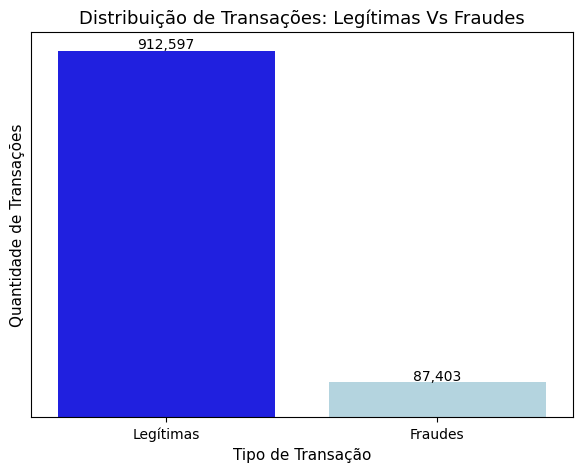

In [52]:
plt.figure(figsize=(7, 5))

ax = sns.countplot(x = 'fraude', data = df, palette = ['blue', 'lightblue'])

plt.title('Distribuição de Transações: Legítimas Vs Fraudes', fontsize = 13)
plt.xlabel('Tipo de Transação', fontsize = 11)
plt.ylabel('Quantidade de Transações', fontsize = 11)

for p in ax.patches:
    altura = p.get_height()
    ax.text(p.get_x() + p.get_width()/2., altura + 5000,
            f'{int(altura):,}',
            ha='center', fontsize=10)

plt.xticks(ticks=[0, 1], labels=['Legítimas', 'Fraudes'])
plt.yticks([])

plt.show()


Visualizando o gráfico acima, podemos chegar a conclusão que nossa base possui uma parcela baixa de fraudes, comparada a transações legítimas, que possui 10x mais a quantidade de fraudes, porém apesar de baixa, ainda se torna preocupante beirando o percentual de 10% de transações fraudulentas, e que registros apontam esse crescimento em fraudes de cartões de crédito.

*   Transações Fraudulentas: 8,74%
*   Transações Legítimas: 91,26%

### 3.2. Aprofundando a Análise
Para podemos aprofundar melhor a nossa análise, vamos separar o DataFrames em dois (Fraudes e Legítimas) a partir da coluna "fraude", para podermos realizar análises minusciosas.







In [53]:
fraudes = df.query('fraude == 1')

legitimas = df.query('fraude == 0')

Após separar o DataFrame em dois, vamos visualizar uma descrição mais detalhada para cada situação.

In [54]:
fraudes.describe().T

,count,mean,std,min,25%,50%,75%,max
distancia_de_casa,87403.0,66.261876,134.391608,0.025847,4.585729,15.454219,101.110104,10632.723672
distancia_da_ultima_transacao,87403.0,12.712185,47.997697,0.000407,0.328199,1.157631,4.598504,2160.499922
razao_preco_medio_compra,87403.0,6.006323,5.564320,0.011966,3.500270,5.071294,7.331222,266.689692
repetiu_estabelecimento,87403.0,0.880119,0.324825,0.000000,1.000000,1.000000,1.000000,1.000000
usou_chip,87403.0,0.256399,0.436647,0.000000,0.000000,0.000000,1.000000,1.000000
usou_pin,87403.0,0.003123,0.055801,0.000000,0.000000,0.000000,0.000000,1.000000
pedido_online,87403.0,0.946318,0.225391,0.000000,1.000000,1.000000,1.000000,1.000000
fraude,87403.0,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000


Acima temos as descrições do DataFrame de Tramsações Fraudulentas.

In [55]:
legitimas.describe().T

,count,mean,std,min,25%,50%,75%,max
distancia_de_casa,912597.0,22.832976,52.828655,0.004874,3.828942,9.673847,24.158057,8777.136420
distancia_da_ultima_transacao,912597.0,4.301391,22.472359,0.000118,0.293859,0.985074,3.268578,11851.104565
razao_preco_medio_compra,912597.0,1.423642,1.946152,0.004399,0.449768,0.913950,1.788918,267.802942
repetiu_estabelecimento,912597.0,0.881672,0.322997,0.000000,1.000000,1.000000,1.000000,1.000000
usou_chip,912597.0,0.359402,0.479825,0.000000,0.000000,0.000000,1.000000,1.000000
usou_pin,912597.0,0.109944,0.312821,0.000000,0.000000,0.000000,0.000000,1.000000
pedido_online,912597.0,0.622225,0.484831,0.000000,0.000000,1.000000,1.000000,1.000000
fraude,912597.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


Acima temos as descrições do DataFrame de Tramsações Legítimas.

E com essas descrições já podemos chegar em algumas percepções:


*   **Distância entre o local da compra e o endereço do titular do cartão:** Apesar de picos entre as transações legítimas (casos isolados), as médias apresentam que transações fraudulentas, que tem em média 66km de distância, tendem a ser **três vezes** mais distante que uma compra legítima.

*   **Distância entre transações consecutivas:** Novamente, transações legítimas registram número até maiores do que fraudes, porém são casos isolados, já que transações fraudulentas tem **três vezes** a distâncias de transações legítimas.

*   **Razão entre o preço médio do cartão e a transação:** Aqui disparam os indicadores, as fraudes registram o aumento dos preços de até **seis vezes** o valor que o titular do cartão utiliza normalmente.

### 3.3. Análise Visual

Para que possamos visualizar melhor os dados, vamos começar a observar um pouco mais os comportamentos das transações de forma visual.



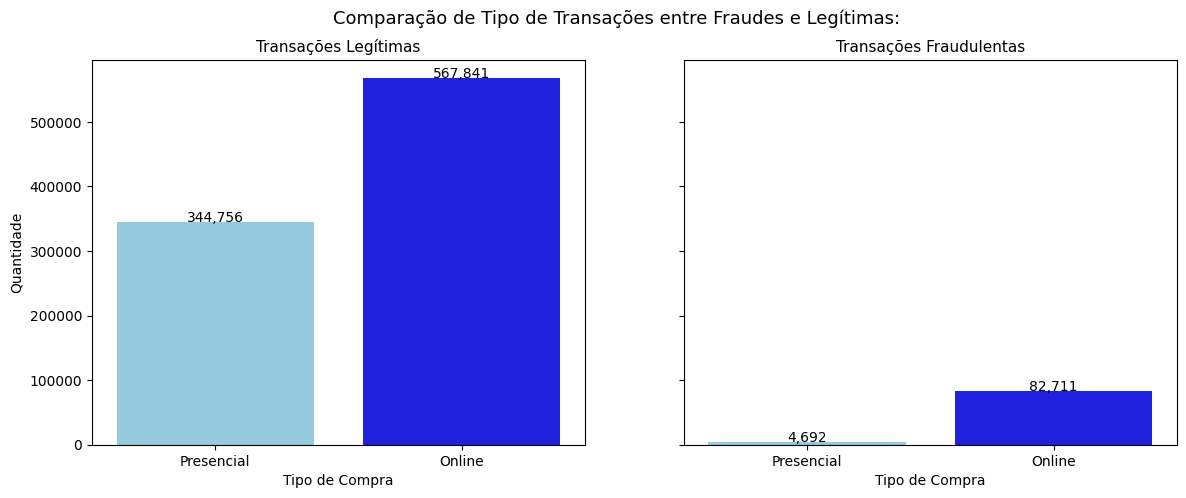

In [56]:
fig, axes = plt.subplots(1, 2, figsize=(14, 5), sharey=True)

ax1 = sns.countplot(x='pedido_online', data=legitimas, palette=['skyblue', 'blue'], ax=axes[0])
ax1.set_title('Transações Legítimas', fontsize=11)
ax1.set_xlabel('Tipo de Compra')
ax1.set_ylabel('Quantidade')
ax1.set_xticks([0, 1])
ax1.set_xticklabels(['Presencial', 'Online'])

for p in ax1.patches:
    alt = p.get_height()
    ax1.text(p.get_x() + p.get_width() / 2., alt + 500, f'{int(alt):,}', ha='center', fontsize=10)

ax2 = sns.countplot(x='pedido_online', data=fraudes, palette=['skyblue', 'blue'], ax=axes[1])
ax2.set_title('Transações Fraudulentas', fontsize=11)
ax2.set_xlabel('Tipo de Compra')
ax2.set_xticks([0, 1])
ax2.set_xticklabels(['Presencial', 'Online'])

for p in ax2.patches:
    alt = p.get_height()
    ax2.text(p.get_x() + p.get_width() / 2., alt + 500, f'{int(alt):,}', ha='center', fontsize=10)

plt.suptitle('Comparação de Tipo de Transações entre Fraudes e Legítimas:', fontsize=13)
plt.show()


Nos gráficos acima é possível notar uma diferença de proporções, obviamente que compras de forma online estão em alta e iriam ser maioria na base de dados, porém podemos visualizar que entre as transações legítimas, nota-se algo mais balanceado, enquanto em transações fraudulentas apresentam uma maioria esmagadora sendo de forma online, para melhor visualização dessa proporção, um gráfico de pizza fica melhor:

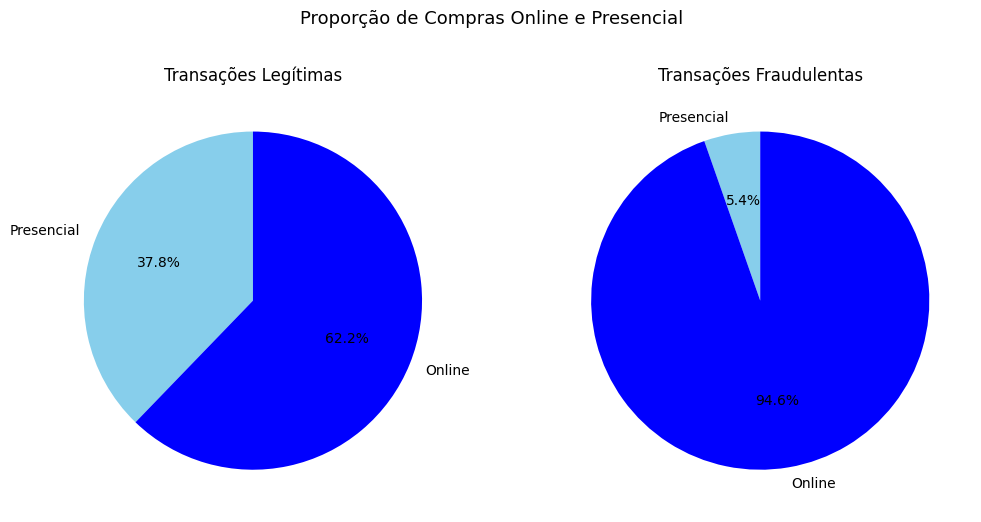

In [57]:
contagem_legitimas = legitimas['pedido_online'].value_counts().sort_index()
contagem_fraudes = fraudes['pedido_online'].value_counts().sort_index()

fig, axes = plt.subplots(1, 2, figsize=(12, 6))

axes[0].pie(contagem_legitimas, labels=['Presencial', 'Online'], colors=['skyblue', 'blue'], autopct='%1.1f%%', startangle=90)
axes[0].set_title('Transações Legítimas')

axes[1].pie(contagem_fraudes, labels=['Presencial', 'Online'], colors=['skyblue', 'blue'], autopct='%1.1f%%', startangle=90)
axes[1].set_title('Transações Fraudulentas')

plt.suptitle('Proporção de Compras Online e Presencial', fontsize=13)
plt.show()

Acima podemos confirmar o que já havia dito antes, que é a tendência maior de compras online em transações classificadas como fraudes, por ser algo prático, fácil e seguro para os fraudadores, vamos observar mais comportamentos dessas situações.

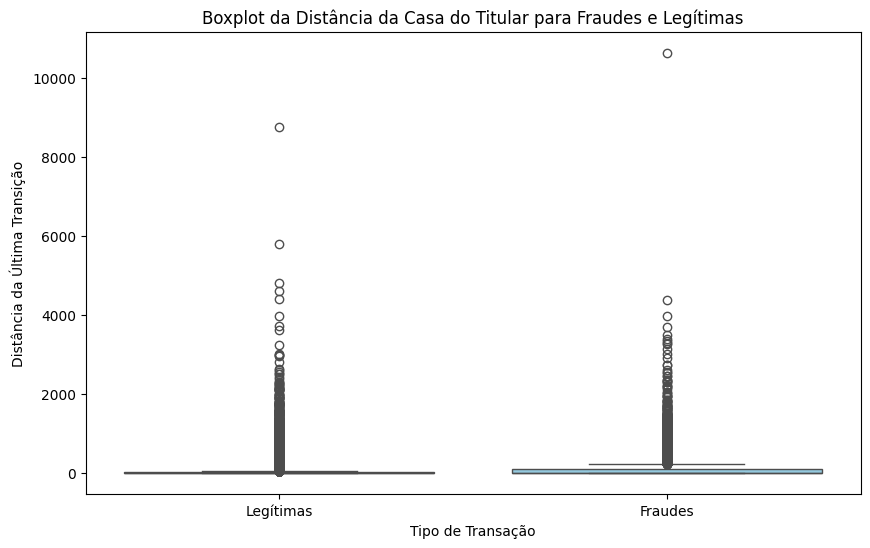

In [58]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='fraude', y='distancia_de_casa', data=df, palette=['blue', 'skyblue'])
plt.title('Boxplot da Distância da Casa do Titular para Fraudes e Legítimas')
plt.xlabel('Tipo de Transação')
plt.ylabel('Distância da Última Transição')
plt.xticks([0, 1], ['Legítimas', 'Fraudes'])
plt.show()

Acima podemos visualizar o boxplot da distância entre onde foi realizada a compra e a casa do titular do cartão, e é possível analisar que apesar das compras legítimas possuirem alguns picos, entre as compras tituladas como fraude se concentram bem mais em longas distâncias e que também nenhum se aproxima a zero, e se concentram em longas distâncias, pois podem obter os dados dos cartões vazados pela internet, provavelmente que a maioria dos fraudadores não tiveram acesso físico ao titular do cartão.

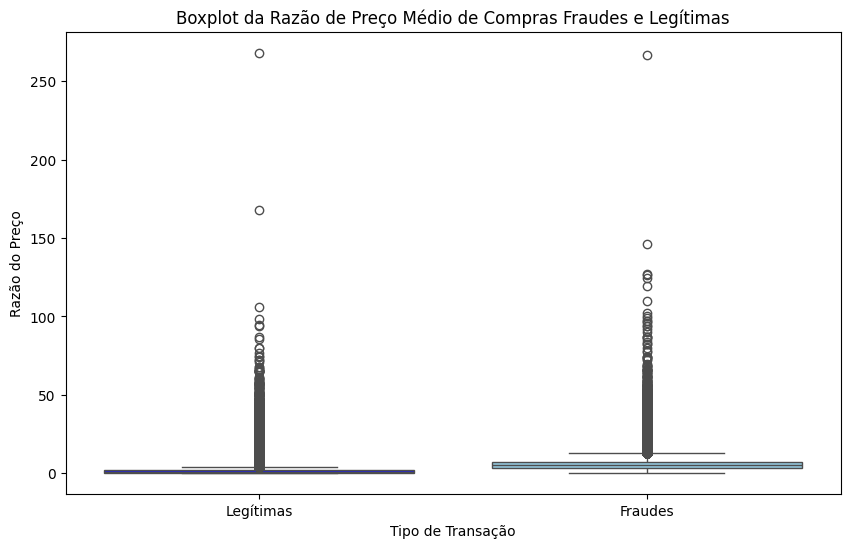

In [59]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='fraude', y='razao_preco_medio_compra', data=df, palette=['blue', 'skyblue'])
plt.title('Boxplot da Razão de Preço Médio de Compras Fraudes e Legítimas')
plt.xlabel('Tipo de Transação')
plt.ylabel('Razão do Preço')
plt.xticks([0, 1], ['Legítimas', 'Fraudes'])
plt.show()

No boxplot acima que mostra a razão entre o preço da compra e o preço médio gasto por compra no cartão, enquanto compras legítimas possuem a média beirando um, ou seja, comprando sempre na mesma faixa de preço, as compras fraudulentas possuem uma média de razão seis, ou seja, fraudadores realizam compras seis vezes mais caras que os titulares dos cartões.

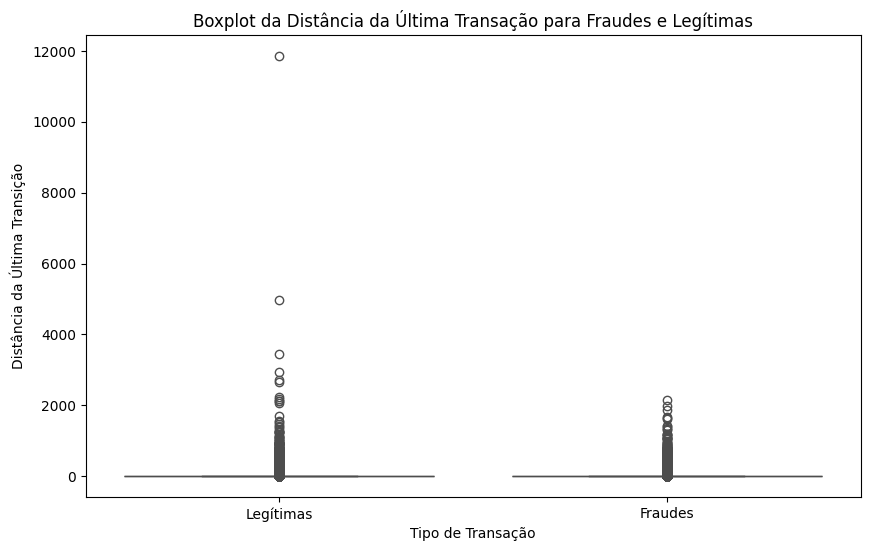

In [61]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='fraude', y='distancia_da_ultima_transacao', data=df, palette=['blue', 'skyblue'])
plt.title('Boxplot da Distância da Última Transação para Fraudes e Legítimas')
plt.xlabel('Tipo de Transação')
plt.ylabel('Distância da Última Transição')
plt.xticks([0, 1], ['Legítimas', 'Fraudes'])
plt.show()

No boxplot acima que mostra a distância entre a compra atual e a última transação no cartão, percebemos dois comportamentos distintos, enquanto compras legítimas possuem uma média de 4,3 km, as compras fraudulentas apresentam uma média de 12,7 km, que sugere o uso do cartão em locais afastados da uma transação a outra, que traz à tona a ideia de roubo e clonagem dos dados de cartões, porém, a mediana entre fraudes e legítimas apresentam uma variação de apenas 200 metros, que mostra provavelmente o uso presencial de um cartão físico roubado.


---

## 4. Conclusões Finais

Essa análise exploratória de dados foi realizada com o intuito de investigar e compreender os comportamentos e padrões entre compras legítimas e fraudulentas, entender os problemas da nossa base de dados utilizada, para desenvolver uma ação contra o aumento preocupante de fraudes de cartões de crédito, em nossa análise vimos que:


*   **Prevalência Online:** Compras que foram catalogadas como fraudes, são em sua maioria esmagadora feitas de forma online, que indica uma forte tendência de uso de dados roubados de cartões de crédito.

*   **Comportamento Geográfio Atípico:** Onde compras fraudulentas são mais distantes da casa do titular e de uma transação a outra, sugerindo que o uso do cartão suspeito de fraude não condiz com o comportamento usual do titual e que é um forte indicador para detecções.

*   **Valores Discrepantes:** Compras fraudulentas são em média seis vezes maiores em relação ao histórico de compras do titular, que também é um outro forte indicador para detecção de fraudes.

Enfim, a análise nos forneceu uma visão detalhada do comportamento de transações fraudulentas, que identificando e quantificando, construimos uma base analítica forte para futuramente trabalhar em um projeto de detecção para combater a escalada preocupante de fraudes de cartões de crédito.



---

## 5. Agradecimentos

Gostaria de agradecer você que leu até aqui, esse é o meu primeiro projeto de análise exploratória de dados, estou aplicando na prática conteúdos estudados nos últimos meses, e eu espero que você tenha gostado! Muito obrigado!




